<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

For this project, I am going to analyze the affect of state budgeting on student test performance. To do this I will be utilizing data provided for the ACT and SAT across states, in addition to budgeting information from the treasury of each state. I would hypothesize that a relative increase in spending in public school funding would cause an increase in students test performance.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
#function takes in a list of numbers and returns their mean
def get_mean(nums):
    return sum(nums) / len(nums)

In [2]:
numlist = [1,3,5,7,9]
get_mean(numlist)

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
#function takes in list of numbers and returns their standard deviation
def std_dev(nums):
    x = 0
    for i in nums:
        x = x + ((i - get_mean(nums)) ** 2)
    return ((x/(len(nums))**0.5))
std_dev(numlist)

17.88854381999832

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [4]:
#function takes in a string a strips the % symbol
def clean_percent(x):
    return float(x.strip('%'))/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [6]:
#reading in data into new dataframes
df = pd.read_csv("data/act_2018.csv")
dftwo = pd.read_csv("data/act_2019.csv") 
dfsat = pd.read_csv("data/sat_2018.csv")
dfsattwo = pd.read_csv("data/sat_2019.csv") 
dfexp = pd.read_csv("data/expenditure.csv")

# **Data Dictionary:**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2018, 2019 ACT and SAT|The name of the state to which the test scores correspond|
|participation|float64|2018, 2019 ACT and SAT|The participation rate for test takers within the state|
|composite|float64|2018, 2019 ACT|The average score across all sections of the ACT within the state| 
|total|int64|2018, 2019 SAT|The average sum of the scores between both sections of the SAT within the state|
|perstudentspending|float64|2018, 2019 ACT and SAT|The investment by the state into education per student|

In [7]:
df.head()
dftwo.head()
dfsat.head()
dfsattwo.head()
dfexp.head()

,State,PerStudentSpending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [8]:
df.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [9]:
dftwo.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [10]:
dfsattwo.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [11]:
dfsat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [12]:
dfexp.head()

,State,PerStudentSpending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


### Having checked the formatting and making sure everything was read in properly I am going to turn to checking types and looking for possible nulls.

In [13]:
dfexp.dtypes

State                 object
PerStudentSpending     int64
dtype: object

In [14]:
df.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [15]:
dftwo.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [16]:
dfsat.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [17]:
dfsattwo.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [18]:
df.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [19]:
dftwo.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [20]:
dfsat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [21]:
dfsattwo.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

### There do not appear to be any nulls so I will go ahead and apply the clean_percent function I wrote above to get Participation columns into percent forms. Additionally, I will convert everything to snakecase and lowercase to make it easier to work with.

In [22]:
df['Participation'] = df['Participation'].apply(clean_percent)

In [23]:
dftwo['Participation'] = dftwo['Participation'].apply(clean_percent)

In [24]:
dfsat['Participation'] = dfsat['Participation'].apply(clean_percent)

In [25]:
dfsat = dfsat.rename(columns={'evidence_based_reading_and_writing': 'ebrw'})

In [26]:
dfsattwo = dfsattwo.replace(to_replace =["—"],  
                            value = 0)

In [27]:
dfsattwo.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [28]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [29]:
dftwo.columns = dftwo.columns.str.replace(' ', '_')
dftwo.columns = dftwo.columns.str.lower()


In [30]:
#adding in the change from evidence_based_reading_and_writing to ebrw so I can merge data later 
dfsat.columns = dfsat.columns.str.replace(' ', '_')
dfsat.columns = dfsat.columns.str.replace('-', '_')
dfsat.columns = dfsat.columns.str.replace('evidence_based_reading_and_writing', 'ebrw')
dfsat.columns = dfsat.columns.str.lower()

In [31]:
dfsattwo.columns = dfsattwo.columns.str.lower()
dfsattwo.columns = dfsattwo.columns.str.replace(' ', '_')

In [32]:
dfsattwo['participation'] = df['participation'].astype(str).apply(lambda x: x.replace('-', '')).astype(str)

In [33]:
dfexp.columns = dfexp.columns.str.lower()
dfexp.head()

,state,perstudentspending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [34]:
dfsattwo['participation'].dtypes

dtype('O')

In [35]:
dfsattwo.isnull().sum()

state                 0
participation_rate    0
ebrw                  0
math                  0
total                 0
participation         1
dtype: int64

In [36]:
dfsattwo = dfsattwo.fillna(0)

In [37]:
#dropping participation_rate column since it is a duplicate and participation is now without nulls
dfsattwo = dfsattwo.drop(['participation_rate'], axis=1)

In [39]:
#renaming so we can marry the datasets on a common feature name
dfsat = dfsat.rename(columns={'evidence_based_reading_and_writing': 'ebrw'})

In [40]:
#dropping the columns since our concern is composite scores not individual subparts to the exams
dfsat = dfsat.drop(['math', 'ebrw'], axis=1)

In [41]:
dfsat.head()

,state,participation,total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [43]:
dfsattwo = dfsattwo.drop(['math', 'ebrw'], axis=1)
dfsattwo.head()

,state,total,participation
0,Alabama,1143,1.0
1,Alaska,1097,0.33
2,Arizona,1134,0.66
3,Arkansas,1141,1.0
4,California,1065,0.27


In [44]:
dfsattwo.dtypes

state            object
total             int64
participation    object
dtype: object

In [45]:
#converting to float now that we properly stripped the column of string features and removed nulls
dfsattwo.astype({'participation': 'float32'}).dtypes

state             object
total              int64
participation    float32
dtype: object

In [46]:
#checking formatting and types once last time before we merge
df.head()

,state,participation,composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [47]:
dftwo.head()

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [48]:
dfsat.head()

,state,participation,total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [49]:
dfsat.dtypes

state             object
participation    float64
total              int64
dtype: object

In [50]:
dfsat.astype({'participation': 'float32'}).dtypes

state             object
participation    float32
total              int64
dtype: object

In [51]:
dfsattwo.head()

,state,total,participation
0,Alabama,1143,1.0
1,Alaska,1097,0.33
2,Arizona,1134,0.66
3,Arkansas,1141,1.0
4,California,1065,0.27


In [52]:
dfexp.head()

,state,perstudentspending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


Now that our dataframes are properly formatted we are going to merge our student spending dataframe to each dataframe individually. Then we are going to join the dataframes that hold a test in common together (i.e. ACT 2018 with ACT 2019, etc.)

In [53]:
df = df.join(dfexp['perstudentspending'])

In [54]:
df.head()

,state,participation,composite,perstudentspending
0,Alabama,1.00,19.1,9696.0
1,Alaska,0.33,20.8,17726.0
2,Arizona,0.66,19.2,8239.0
3,Arkansas,1.00,19.4,10139.0
4,California,0.27,22.7,12498.0


In [55]:
df.shape

(52, 4)

In [56]:
dftwo = dftwo.join(dfexp['perstudentspending'])
dfsat = dfsat.join(dfexp['perstudentspending'])
dfsattwo = dfsattwo.join(dfexp['perstudentspending'])

In [57]:
dfjoined = [df,dftwo]
dfact = pd.concat(dfjoined, keys=['2018 act', '2019 act'])
dfjoinedsat = [dfsat,dfsattwo]
dfsat = pd.concat(dfjoinedsat, keys=['2018 sat', '2019 sat'])

In [58]:
dfact.dtypes

state                  object
participation         float64
composite             float64
perstudentspending    float64
dtype: object

In [59]:
dfsat.dtypes

state                  object
participation          object
total                   int64
perstudentspending    float64
dtype: object

Writing the cleaned dataframes to new csv files.

In [60]:
dfact.to_csv('cleanact.csv')

In [61]:
dfsat.to_csv('cleansat.csv')

## Exploratory Data Analysis

In [62]:
#getting summary statistics for the adjoined dataframe
dfact.describe()

,participation,composite,perstudentspending
count,104.000000,104.000000,102.000000
mean,0.596058,21.497115,12916.549020
std,0.342170,2.137708,3831.881488
min,0.060000,17.700000,7628.000000
25%,0.267500,19.800000,10089.500000
50%,0.585000,21.150000,11920.000000
75%,1.000000,23.725000,15539.750000
max,1.000000,25.600000,24040.000000


In [63]:
dfsat.describe()

,total,perstudentspending
count,104.000000,102.000000
mean,1113.144231,12916.549020
std,97.462307,3831.881488
min,935.000000,7628.000000
25%,1031.500000,10089.500000
50%,1097.000000,11920.000000
75%,1202.500000,15539.750000
max,1298.000000,24040.000000


In [64]:
#looking for relationship by average state outcome and spending or participation
dfact.sort_values(by='composite', ascending=False)

state  participation  composite  perstudentspending
2018 act 6      Connecticut           0.26       25.6             20635.0
2019 act 6      Connecticut           0.22       25.5             20635.0
2018 act 22   Massachusetts           0.25       25.5             12345.0
2019 act 21   Massachusetts           0.21       25.5             17058.0
2018 act 30   New Hampshire           0.16       25.1             20021.0
...                     ...            ...        ...                 ...
         25     Mississippi           1.00       18.6             10810.0
2019 act 24     Mississippi           1.00       18.4              8935.0
2018 act 41  South Carolina           1.00       18.3             10073.0
2019 act 28          Nevada           1.00       17.9              9417.0
2018 act 29          Nevada           1.00       17.7             16893.0

[104 rows x 4 columns]

In [65]:
dfsat.sort_values(by='total', ascending=False)

state participation  total  perstudentspending
2018 sat 23             Minnesota          0.04   1298             12975.0
         49             Wisconsin          0.03   1294             12285.0
2019 sat 23             Minnesota          0.22   1284             12975.0
         51             Wisconsin           1.0   1283                 NaN
2018 sat 34          North Dakota          0.02   1283             13758.0
...                           ...           ...    ...                 ...
2019 sat 8   District of Columbia          0.32    975             22759.0
         36              Oklahoma           1.0    963              8239.0
         39           Puerto Rico           0.2    944             16121.0
         50         West Virginia           1.0    943             16224.0
         47        Virgin Islands          0.24    935             12995.0

[104 rows x 4 columns]

In [66]:
dfsat.isnull().sum()

state                 0
participation         0
total                 0
perstudentspending    2
dtype: int64

In [67]:
dfact.isnull().sum()

state                 0
participation         0
composite             0
perstudentspending    2
dtype: int64

In [68]:
dfact.fillna(dfact['perstudentspending'].mean())
dfsat.fillna(dfsat['perstudentspending'].mean())

state participation  total  perstudentspending
2018 sat 0         Alabama          0.06   1166          9696.00000
         1          Alaska          0.43   1106         17726.00000
         2         Arizona          0.29   1149          8239.00000
         3        Arkansas          0.05   1169         10139.00000
         4      California           0.6   1076         12498.00000
...                    ...           ...    ...                 ...
2019 sat 48       Virginia          0.24   1119         11334.00000
         49     Washington          0.65   1074         12285.00000
         50  West Virginia           1.0    943         16224.00000
         51      Wisconsin           1.0   1283         12916.54902
         52        Wyoming             0   1238         12916.54902

[104 rows x 4 columns]

In [69]:
#checking participation and perstudent spending in tabular form
dfact.sort_values(by='participation', ascending=False)

state  participation  composite  perstudentspending
2018 act 0          Alabama           1.00       19.1              9696.0
         27         Montana           1.00       20.0             12491.0
         29          Nevada           1.00       17.7             16893.0
         34  North Carolina           1.00       19.1             13758.0
         36            Ohio           1.00       20.3              8239.0
...                     ...            ...        ...                 ...
2019 act 7         Delaware           0.13       24.1             15639.0
         39    Rhode Island           0.12       24.7             16121.0
2018 act 20           Maine           0.07       24.0             14762.0
         19           Maine           0.07       24.0             14145.0
2019 act 19           Maine           0.06       24.3             14145.0

[104 rows x 4 columns]

In [72]:
dfsat["total"].corr(dfsat["perstudentspending"])

-0.20627623374673684

In [73]:
dfact["composite"].corr(dfact['perstudentspending'])

0.42402241769437427

We already are seeing some surprising numbers. For starters our highest per student spending state is nearly twice as much as the mean. However, when we look at the groupby above by total or composite (depending on test), we dont see the highest performing state as the highest perstudentspending. To be sure, with the ACT, the highest performing states (Connecticut and Massachussetts) do appear to be spending more than the mean, but so do the lowest performing states (Nevada). This relationship is even less clear when we look at the SAT.

## Data Visualization

In [74]:
#performance metric to see what states spend above average just to adjust future graphs to center on the mean
dfsat['outperform'] = (dfsat['perstudentspending'] - dfsat['perstudentspending'].mean())

In [75]:
dfact['outperform'] = (dfact['perstudentspending'] - dfact['perstudentspending'].mean())

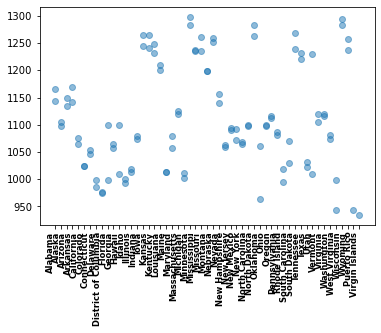

In [76]:
#a visualization to see the variance
plt.scatter(dfsat['state'], dfsat['total'], alpha=0.5)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='small'  
)
plt.show()

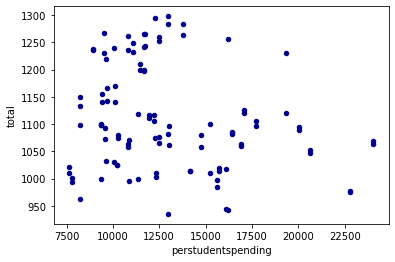

In [78]:
#lookign for a relationship between perstudentspending and total overall score for SAT
ax1 = dfsat.plot.scatter(x='perstudentspending',
                      y='total',
                      c='DarkBlue')
#surprisingly seems to suggest that spending right at the median nets you the better total for SAT

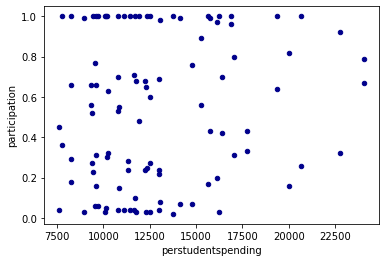

In [79]:
#checking perstudentspending and participation relationship
ax2 = dfsat.plot.scatter(x='perstudentspending',
                      y='participation',
                      c='DarkBlue')
#there is no immediately obvious correlation between investment and participation on this graph

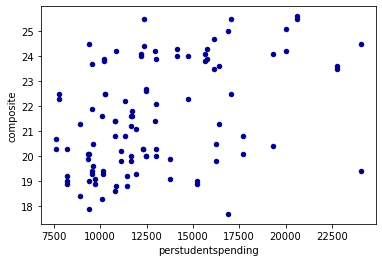

In [80]:
#checking perstudnetspendign and overall composite on the ACT
ax3 = dfact.plot.scatter(x='perstudentspending',
                      y='composite',
                      c='DarkBlue')

#this looks like a positive correlation, however, not as positive or linear as I would have expected

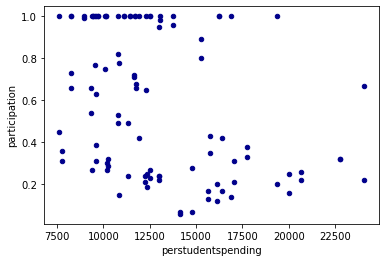

In [81]:
#checking perstudentspending and participation relationships through visualization
ax4 = dfact.plot.scatter(x='perstudentspending',
                        y='participation',
                        c='DarkBlue')

#this graphs seems to suggest some level of negative correlation between perstudentspending and participation, with highest
#participation being centered around the mean level of perstudentspending

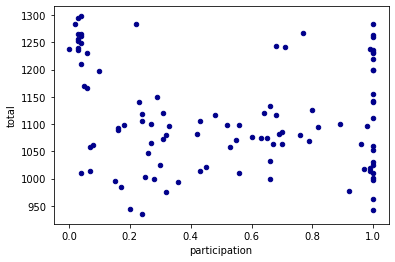

In [82]:
#looking at total SAT scores as participation rates change within the states
ax5 = dfsat.plot.scatter(x='participation',
                        y='total',
                        c='DarkBlue')

#no clear relationship between high participation and total SAT scores, however a tight cluster found in states with low
#participation rates. Perhaps these are high performing, self-driven students

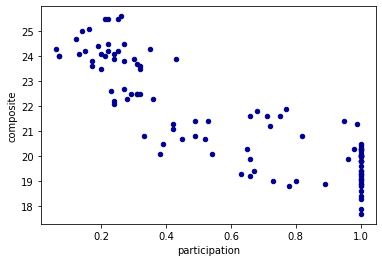

In [83]:
#looking at participation by ACT composite scores
ax6 = dfact.plot.scatter(x='participation',
                        y='composite',
                        c='DarkBlue')

#Similar to perstudentspending we see a negative relationship between participation and composite. Much more linear than
#the SAT

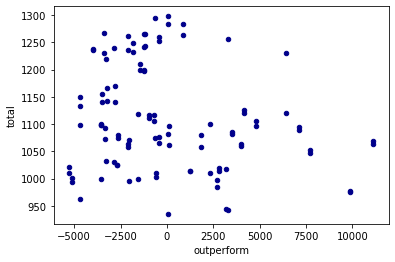

In [84]:
#The following graphs will just shift the graphs to the left so we can better visualize what outperforming the
#national average might do for a state
ax7 = dfsat.plot.scatter(x='outperform',
                        y='total',
                        c='DarkBlue')

#as we can see there is no discernable benefit from increasing student spending in terms of SAT outcome

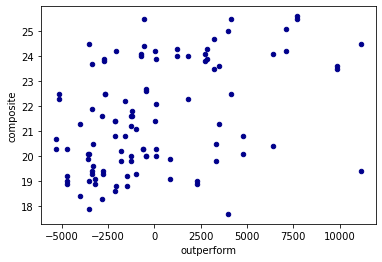

In [85]:
#Similar to above but with ACT
ax8 = dfact.plot.scatter(x='outperform',
                        y='composite',
                        c='DarkBlue')

#THere does look to be a benefit in investment for your states students ACT outcomes. Many states well above the mean are 
#outperforming their peers

In [86]:
dfsat.describe()

,total,perstudentspending,outperform
count,104.000000,102.000000,1.020000e+02
mean,1113.144231,12916.549020,4.993304e-13
std,97.462307,3831.881488,3.831881e+03
min,935.000000,7628.000000,-5.288549e+03
25%,1031.500000,10089.500000,-2.827049e+03
50%,1097.000000,11920.000000,-9.965490e+02
75%,1202.500000,15539.750000,2.623201e+03
max,1298.000000,24040.000000,1.112345e+04


In [87]:
dfact.describe()

,participation,composite,perstudentspending,outperform
count,104.000000,104.000000,102.000000,1.020000e+02
mean,0.596058,21.497115,12916.549020,4.993304e-13
std,0.342170,2.137708,3831.881488,3.831881e+03
min,0.060000,17.700000,7628.000000,-5.288549e+03
25%,0.267500,19.800000,10089.500000,-2.827049e+03
50%,0.585000,21.150000,11920.000000,-9.965490e+02
75%,1.000000,23.725000,15539.750000,2.623201e+03
max,1.000000,25.600000,24040.000000,1.112345e+04


## Conclusions and Recommendations

Surprisingly investment on a per student basis does not correlate with testing outcomes as heavily as I would have suspected. The return on investment between the SAT and ACT is somewhat staggering, however, as the ACT outcomes do tend to increase as state investment increases with a corellation score of around .4, compared to the negative correlation score between the SAT and investment of around -.2. Out of surprise I attempted to see if I could explain this through diminishing returns on investment.To do this I used an outperform feature which would just look at the difference between the states investment compared to the national average. This did not correct anything, but did show that increased investment over the national average wouldhelp ACT scores, while it would actually do nothing for SAT scores.

So what can we see from this data? Very little relationship between per student spending and participation, but even more astounding is the very clear negative relationship between participation and test outcomes. This could suggest thatstudents that are eager would take the tests anyway, and they are outperforming, but the students that otherwise would not take the testbut by mandate are underperforming. This could make a great deal of sense as there are many different expectations at an individual level that might prohibit excellence on an exam. 

While it is difficult to examine such complex individual hurdles that might lead to lower performance there are some
shortcomings in my own data, as well. I was only able to get perstudentspending from a 2018 report, and since these scores are from 2018 and 2019, the data might be skewed. Additionally this perstudentspending is not specific to testing, it is generic budget spending, with no sub-categories which might be more specific and valuable to a states budget planners. It might be worth analyzing the differential in spending from a year-to-year basis and seeing that relationship to the testing outcomes. My other recommendations would not necessarily be to stop enforcing testing mandates, as more participation is likely important for the good of the individuals future and therefore the states. However, after careful consideration of alternate pathways into careers, a state might consider that college entrance exams might not be necessary if there is a robust infrastructure for careers outside of higher education. There is a lot more to look at, and purging the data of subcategories like the individual components of the test scores might have warranted slightly different conclusions. Such as analyzing whether math scores or verbal scores were indivudally affected by investment, moreso than the total. This could give us a future glimpse into whether
the subcategories of educational spending are worth a look.

Overall, this data does suggest that keeping up with the national average of per student spending is a worthy goal and one that will ensure at the very least that the students are given adequate opportunities to test well, with the exception of if the state is more focused on the ACT, as there is a moderate relationship between increased spending beyond the national average and student outcomes.